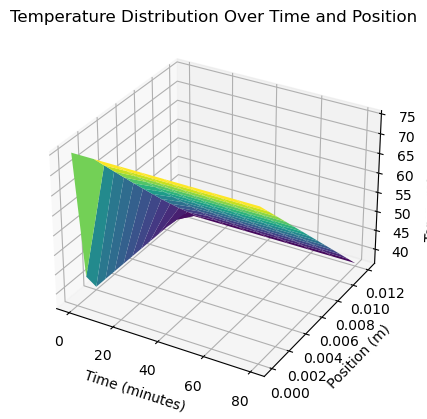

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 材料参数
k1, k2, k3 = 0.04, 0.02, 0.01  # 热导率 (W/m·K)
rho1, rho2, rho3 = 130, 160, 190  # 密度 (kg/m³)
cp1, cp2, cp3 = 1000, 1000, 1000  # 比热容 (J/kg·K)

# 问题条件
env_temp = 75  # 环境温度 (°C)
init_temp = 37  # 初始假人体温 (°C)
t_total = 90 * 60  # 总时间 (秒)
dx = 0.001  # 空间步长 (米)
dt = 1  # 时间步长 (秒)

# 分层厚度
thickness_I = 0.001  # I层厚度 (米)
thickness_II = 0.006  # II层厚度 (米)
thickness_IV = 0.005  # IV层厚度 (米)
thickness_total = thickness_I + thickness_II + thickness_IV

# 计算节点数
n_nodes = int(thickness_total / dx) + 1

# 初始化温度分布
T = np.ones(n_nodes) * init_temp

# 设置边界条件
T[0] = env_temp  # 环境温度
T[-1] = init_temp  # 假人体温

# 计算热扩散系数
alpha1 = k1 / (rho1 * cp1)
alpha2 = k2 / (rho2 * cp2)
alpha3 = k3 / (rho3 * cp3)

# 显式欧拉法进行迭代计算
temperature_distribution = []
time_points = []
for t in range(int(t_total / dt)):
    T_new = T.copy()
    for i in range(1, n_nodes - 1):
        if i < int(thickness_I / dx):
            alpha = alpha1
        elif i < int((thickness_I + thickness_II) / dx):
            alpha = alpha2
        else:
            alpha = alpha3
        T_new[i] = T[i] + alpha * dt / (dx ** 2) * (T[i + 1] - 2 * T[i] + T[i - 1])
    T = T_new.copy()
    if t % 600 == 0:  # 每10分钟记录一次温度分布
        temperature_distribution.append(T.copy())
        time_points.append(t)

# 转换时间点为分钟
time_points = np.array(time_points) / 60

# 保存温度分布到Excel文件
df = pd.DataFrame({"Position (m)": np.linspace(0, thickness_total, n_nodes), "Temperature (°C)": T})
df.to_excel("./problem1.xlsx", index=False)

# 生成三维图
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# 空间点
position_points = np.linspace(0, thickness_total, n_nodes)
# 构建网格
X, Y = np.meshgrid(time_points, position_points)
Z = np.array(temperature_distribution).T

ax.plot_surface(X, Y, Z, cmap='viridis')
ax.set_xlabel('Time (minutes)')
ax.set_ylabel('Position (m)')
ax.set_zlabel('Temperature (°C)')
ax.set_title('Temperature Distribution Over Time and Position')

plt.savefig("./temperature_distribution_3d.png")
plt.show()


In [ ]:
第一版（英文）

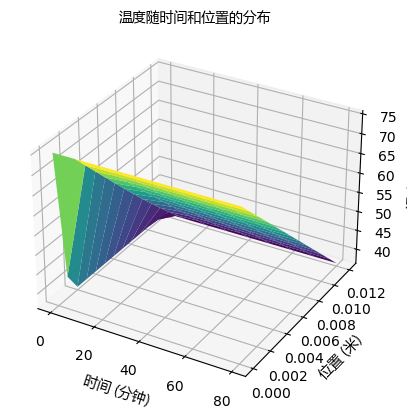

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.font_manager as fm

# 材料参数
k1, k2, k3 = 0.04, 0.02, 0.01  # 热导率 (W/m·K)
rho1, rho2, rho3 = 130, 160, 190  # 密度 (kg/m³)
cp1, cp2, cp3 = 1000, 1000, 1000  # 比热容 (J/kg·K)

# 问题条件
env_temp = 75  # 环境温度 (°C)
init_temp = 37  # 初始假人体温 (°C)
t_total = 90 * 60  # 总时间 (秒)
dx = 0.001  # 空间步长 (米)
dt = 1  # 时间步长 (秒)

# 分层厚度
thickness_I = 0.001  # I层厚度 (米)
thickness_II = 0.006  # II层厚度 (米)
thickness_IV = 0.005  # IV层厚度 (米)
thickness_total = thickness_I + thickness_II + thickness_IV

# 计算节点数
n_nodes = int(thickness_total / dx) + 1

# 初始化温度分布
T = np.ones(n_nodes) * init_temp

# 设置边界条件
T[0] = env_temp  # 环境温度
T[-1] = init_temp  # 假人体温

# 计算热扩散系数
alpha1 = k1 / (rho1 * cp1)
alpha2 = k2 / (rho2 * cp2)
alpha3 = k3 / (rho3 * cp3)

# 显式欧拉法进行迭代计算
temperature_distribution = []
time_points = []
for t in range(int(t_total / dt)):
    T_new = T.copy()
    for i in range(1, n_nodes - 1):
        if i < int(thickness_I / dx):
            alpha = alpha1
        elif i < int((thickness_I + thickness_II) / dx):
            alpha = alpha2
        else:
            alpha = alpha3
        T_new[i] = T[i] + alpha * dt / (dx ** 2) * (T[i + 1] - 2 * T[i] + T[i - 1])
    T = T_new.copy()
    if t % 600 == 0:  # 每10分钟记录一次温度分布
        temperature_distribution.append(T.copy())
        time_points.append(t)

# 转换时间点为分钟
time_points = np.array(time_points) / 60

# 保存温度分布到Excel文件
df = pd.DataFrame({"位置 (米)": np.linspace(0, thickness_total, n_nodes), "温度 (°C)": T})
df.to_excel("./problem1.xlsx", index=False)

# 设置中文字体
zh_font = fm.FontProperties(fname='C:/Windows/Fonts/msyh.ttc')

# 生成三维图
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# 空间点
position_points = np.linspace(0, thickness_total, n_nodes)
# 构建网格
X, Y = np.meshgrid(time_points, position_points)
Z = np.array(temperature_distribution).T

ax.plot_surface(X, Y, Z, cmap='viridis')
ax.set_xlabel('时间 (分钟)', fontproperties=zh_font)
ax.set_ylabel('位置 (米)', fontproperties=zh_font)
ax.set_zlabel('温度 (°C)', fontproperties=zh_font)
ax.set_title('温度随时间和位置的分布', fontproperties=zh_font)

plt.savefig("./temperature_distribution_3d.png")
plt.show()


In [ ]:
距离，温度，时间 （中文）

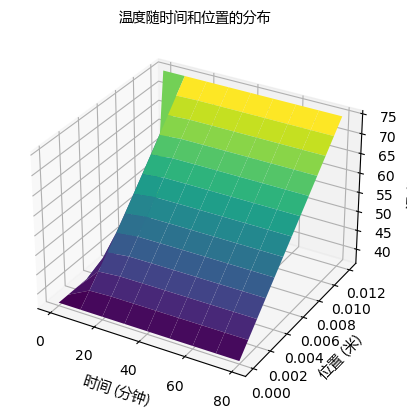

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.font_manager as fm

# 材料参数
k1, k2, k3 = 0.04, 0.02, 0.01  # 热导率 (W/m·K)
rho1, rho2, rho3 = 130, 160, 190  # 密度 (kg/m³)
cp1, cp2, cp3 = 1000, 1000, 1000  # 比热容 (J/kg·K)

# 问题条件
env_temp = 75  # 环境温度 (°C)
init_temp = 37  # 初始假人体温 (°C)
t_total = 90 * 60  # 总时间 (秒)
dx = 0.001  # 空间步长 (米)
dt = 1  # 时间步长 (秒)

# 分层厚度
thickness_I = 0.001  # I层厚度 (米)
thickness_II = 0.006  # II层厚度 (米)
thickness_IV = 0.005  # IV层厚度 (米)
thickness_total = thickness_I + thickness_II + thickness_IV

# 计算节点数
n_nodes = int(thickness_total / dx) + 1

# 初始化温度分布
T = np.ones(n_nodes) * init_temp

# 设置边界条件
T[0] = env_temp  # 环境温度
T[-1] = init_temp  # 假人体温

# 计算热扩散系数
alpha1 = k1 / (rho1 * cp1)
alpha2 = k2 / (rho2 * cp2)
alpha3 = k3 / (rho3 * cp3)

# 显式欧拉法进行迭代计算
temperature_distribution = []
time_points = []
for t in range(int(t_total / dt)):
    T_new = T.copy()
    for i in range(1, n_nodes - 1):
        if i < int(thickness_I / dx):
            alpha = alpha1
        elif i < int((thickness_I + thickness_II) / dx):
            alpha = alpha2
        else:
            alpha = alpha3
        T_new[i] = T[i] + alpha * dt / (dx ** 2) * (T[i + 1] - 2 * T[i] + T[i - 1])
    T = T_new.copy()
    if t % 600 == 0:  # 每10分钟记录一次温度分布
        temperature_distribution.append(T.copy())
        time_points.append(t)

# 转换时间点为分钟
time_points = np.array(time_points) / 60

# 逆转温度分布，使距离与温度成正比
temperature_distribution = np.array(temperature_distribution)[:, ::-1]

# 保存温度分布到Excel文件
df = pd.DataFrame({"位置 (米)": np.linspace(0, thickness_total, n_nodes), "温度 (°C)": T[::-1]})
df.to_excel("./problem1.xlsx", index=False)

# 设置中文字体
zh_font = fm.FontProperties(fname='C:/Windows/Fonts/msyh.ttc')

# 生成三维图
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# 空间点
position_points = np.linspace(0, thickness_total, n_nodes)
# 构建网格
X, Y = np.meshgrid(time_points, position_points)
Z = np.array(temperature_distribution).T

ax.plot_surface(X, Y, Z, cmap='viridis')
ax.set_xlabel('时间 (分钟)', fontproperties=zh_font)
ax.set_ylabel('位置 (米)', fontproperties=zh_font)
ax.set_zlabel('温度 (°C)', fontproperties=zh_font)
ax.set_title('温度随时间和位置的分布', fontproperties=zh_font)

plt.savefig("./temperature_distribution_3d.png")
plt.show()


距离，温度，时间 （可视化优化）

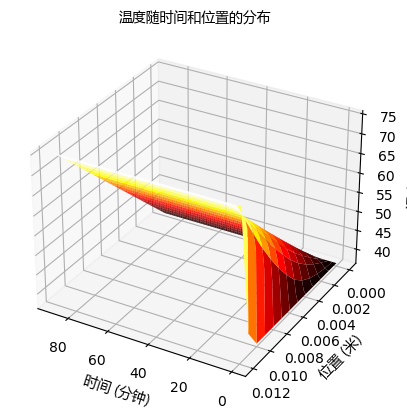

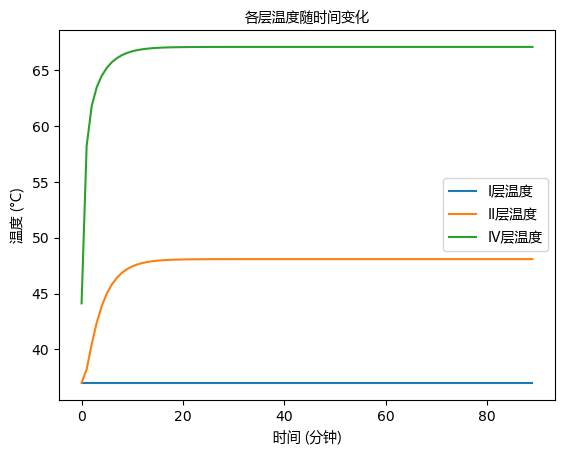

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.font_manager as fm

# 材料参数
k1, k2, k3 = 0.04, 0.02, 0.01  # 热导率 (W/m·K)
rho1, rho2, rho3 = 130, 160, 190  # 密度 (kg/m³)
cp1, cp2, cp3 = 1000, 1000, 1000  # 比热容 (J/kg·K)

# 问题条件
env_temp = 75  # 环境温度 (°C)
init_temp = 37  # 初始假人体温 (°C)
t_total = 90 * 60  # 总时间 (秒)
dx = 0.001  # 空间步长 (米)
dt = 1  # 时间步长 (秒)

# 分层厚度
thickness_I = 0.001  # I层厚度 (米)
thickness_II = 0.006  # II层厚度 (米)
thickness_IV = 0.005  # IV层厚度 (米)
thickness_total = thickness_I + thickness_II + thickness_IV

# 计算节点数
n_nodes = int(thickness_total / dx) + 1

# 初始化温度分布
T = np.ones(n_nodes) * init_temp

# 设置边界条件
T[0] = env_temp  # 环境温度
T[-1] = init_temp  # 假人体温

# 计算热扩散系数
alpha1 = k1 / (rho1 * cp1)
alpha2 = k2 / (rho2 * cp2)
alpha3 = k3 / (rho3 * cp3)

# 显式欧拉法进行迭代计算
temperature_distribution = []
time_points = []
for t in range(int(t_total / dt)):
    T_new = T.copy()
    for i in range(1, n_nodes - 1):
        if i < int(thickness_I / dx):
            alpha = alpha1
        elif i < int((thickness_I + thickness_II) / dx):
            alpha = alpha2
        else:
            alpha = alpha3
        T_new[i] = T[i] + alpha * dt / (dx ** 2) * (T[i + 1] - 2 * T[i] + T[i - 1])
    T = T_new.copy()
    if t % 60 == 0:  # 每分钟记录一次温度分布
        temperature_distribution.append(T.copy())
        time_points.append(t)

# 转换时间点为分钟
time_points = np.array(time_points) / 60

# 逆转温度分布，使距离与温度成正比
temperature_distribution = np.array(temperature_distribution)[:, ::-1]

# 分离每层的温度分布
I_layer_indices = slice(0, int(thickness_I / dx))
II_layer_indices = slice(int(thickness_I / dx), int((thickness_I + thickness_II) / dx))
IV_layer_indices = slice(int((thickness_I + thickness_II) / dx), n_nodes)

temperature_I_layer = np.array([dist[I_layer_indices].mean() for dist in temperature_distribution])
temperature_II_layer = np.array([dist[II_layer_indices].mean() for dist in temperature_distribution])
temperature_IV_layer = np.array([dist[IV_layer_indices].mean() for dist in temperature_distribution])

# 保存温度分布到Excel文件
df = pd.DataFrame({
    "时间 (分钟)": time_points,
    "I层平均温度 (°C)": temperature_I_layer,
    "II层平均温度 (°C)": temperature_II_layer,
    "IV层平均温度 (°C)": temperature_IV_layer
})
df.to_excel("./layered_temperature_distribution.xlsx", index=False)

# 设置中文字体
zh_font = fm.FontProperties(fname='C:/Windows/Fonts/msyh.ttc')

# 生成三维图
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# 空间点
position_points = np.linspace(0, thickness_total, n_nodes)
# 构建网格
X, Y = np.meshgrid(time_points, position_points)
Z = np.array(temperature_distribution).T

# 使用热图颜色映射，温度越高越红，温度越低越蓝
ax.plot_surface(X, Y, Z, cmap='hot')
ax.set_xlabel('时间 (分钟)', fontproperties=zh_font)
ax.set_ylabel('位置 (米)', fontproperties=zh_font)
ax.set_zlabel('温度 (°C)', fontproperties=zh_font)
ax.set_title('温度随时间和位置的分布', fontproperties=zh_font)

# 调整视角
ax.view_init(elev=30, azim=120)

plt.savefig("./temperature_distribution_3d.png")
plt.show()

# 可视化每层的温度分布随时间变化的关系
plt.figure()
plt.plot(time_points, temperature_I_layer, label='I层温度')
plt.plot(time_points, temperature_II_layer, label='II层温度')
plt.plot(time_points, temperature_IV_layer, label='IV层温度')
plt.xlabel('时间 (分钟)', fontproperties=zh_font)
plt.ylabel('温度 (°C)', fontproperties=zh_font)
plt.title('各层温度随时间变化', fontproperties=zh_font)
plt.legend(prop=zh_font)
plt.savefig("./layered_temperature_vs_time.png")
plt.show()


可视化优化

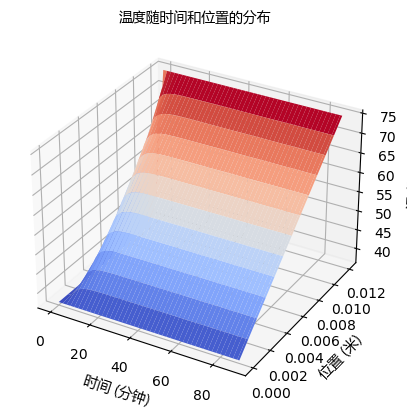

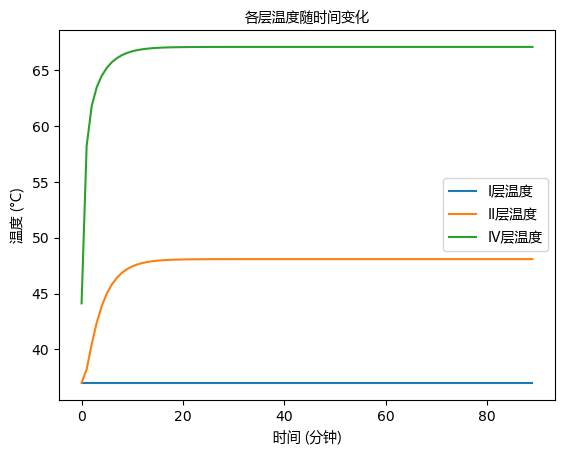

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.font_manager as fm

# 材料参数
k1, k2, k3 = 0.04, 0.02, 0.01  # 热导率 (W/m·K)
rho1, rho2, rho3 = 130, 160, 190  # 密度 (kg/m³)
cp1, cp2, cp3 = 1000, 1000, 1000  # 比热容 (J/kg·K)

# 问题条件
env_temp = 75  # 环境温度 (°C)
init_temp = 37  # 初始假人体温 (°C)
t_total = 90 * 60  # 总时间 (秒)
dx = 0.001  # 空间步长 (米)
dt = 1  # 时间步长 (秒)

# 分层厚度
thickness_I = 0.001  # I层厚度 (米)
thickness_II = 0.006  # II层厚度 (米)
thickness_IV = 0.005  # IV层厚度 (米)
thickness_total = thickness_I + thickness_II + thickness_IV

# 计算节点数
n_nodes = int(thickness_total / dx) + 1

# 初始化温度分布
T = np.ones(n_nodes) * init_temp

# 设置边界条件
T[0] = env_temp  # 环境温度
T[-1] = init_temp  # 假人体温

# 计算热扩散系数
alpha1 = k1 / (rho1 * cp1)
alpha2 = k2 / (rho2 * cp2)
alpha3 = k3 / (rho3 * cp3)

# 显式欧拉法进行迭代计算
temperature_distribution = []
time_points = []
for t in range(int(t_total / dt)):
    T_new = T.copy()
    for i in range(1, n_nodes - 1):
        if i < int(thickness_I / dx):
            alpha = alpha1
        elif i < int((thickness_I + thickness_II) / dx):
            alpha = alpha2
        else:
            alpha = alpha3
        T_new[i] = T[i] + alpha * dt / (dx ** 2) * (T[i + 1] - 2 * T[i] + T[i - 1])
    T = T_new.copy()
    if t % 60 == 0:  # 每分钟记录一次温度分布
        temperature_distribution.append(T.copy())
        time_points.append(t)

# 转换时间点为分钟
time_points = np.array(time_points) / 60

# 逆转温度分布，使距离与温度成正比
temperature_distribution = np.array(temperature_distribution)[:, ::-1]

# 分离每层的温度分布
I_layer_indices = slice(0, int(thickness_I / dx))
II_layer_indices = slice(int(thickness_I / dx), int((thickness_I + thickness_II) / dx))
IV_layer_indices = slice(int((thickness_I + thickness_II) / dx), n_nodes)

temperature_I_layer = np.array([dist[I_layer_indices].mean() for dist in temperature_distribution])
temperature_II_layer = np.array([dist[II_layer_indices].mean() for dist in temperature_distribution])
temperature_IV_layer = np.array([dist[IV_layer_indices].mean() for dist in temperature_distribution])

# 保存温度分布到Excel文件
df = pd.DataFrame({
    "时间 (分钟)": time_points,
    "I层平均温度 (°C)": temperature_I_layer,
    "II层平均温度 (°C)": temperature_II_layer,
    "IV层平均温度 (°C)": temperature_IV_layer
})
df.to_excel("./layered_temperature_distribution.xlsx", index=False)

# 设置中文字体
zh_font = fm.FontProperties(fname='C:/Windows/Fonts/msyh.ttc')

# 生成三维图
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# 空间点
position_points = np.linspace(0, thickness_total, n_nodes)
# 构建网格
X, Y = np.meshgrid(time_points, position_points)
Z = np.array(temperature_distribution).T

ax.plot_surface(X, Y, Z, cmap='coolwarm')  # 颜色映射设置为coolwarm
ax.set_xlabel('时间 (分钟)', fontproperties=zh_font)
ax.set_ylabel('位置 (米)', fontproperties=zh_font)
ax.set_zlabel('温度 (°C)', fontproperties=zh_font)
ax.set_title('温度随时间和位置的分布', fontproperties=zh_font)

plt.savefig("./temperature_distribution_3d.png")
plt.show()

# 可视化每层的温度分布随时间变化的关系
plt.figure()
plt.plot(time_points, temperature_I_layer, label='I层温度')
plt.plot(time_points, temperature_II_layer, label='II层温度')
plt.plot(time_points, temperature_IV_layer, label='IV层温度')
plt.xlabel('时间 (分钟)', fontproperties=zh_font)
plt.ylabel('温度 (°C)', fontproperties=zh_font)
plt.title('各层温度随时间变化', fontproperties=zh_font)
plt.legend(prop=zh_font)
plt.savefig("./layered_temperature_vs_time.png")
plt.show()


可视化优化

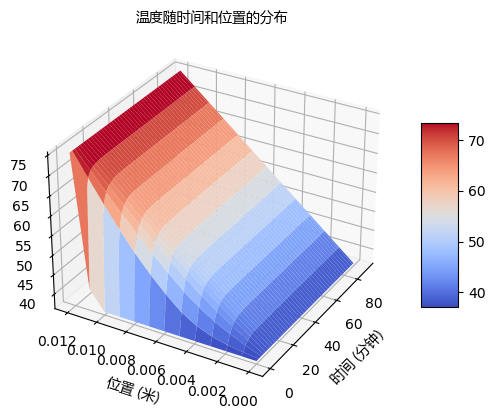

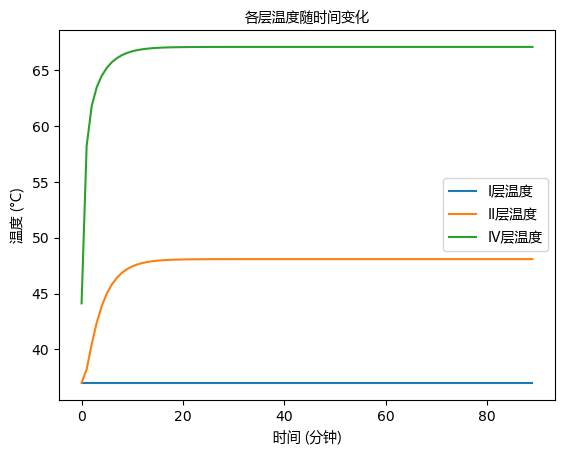

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.font_manager as fm

# 材料参数
k1, k2, k3 = 0.04, 0.02, 0.01  # 热导率 (W/m·K)
rho1, rho2, rho3 = 130, 160, 190  # 密度 (kg/m³)
cp1, cp2, cp3 = 1000, 1000, 1000  # 比热容 (J/kg·K)

# 问题条件
env_temp = 75  # 环境温度 (°C)
init_temp = 37  # 初始假人体温 (°C)
t_total = 90 * 60  # 总时间 (秒)
dx = 0.001  # 空间步长 (米)
dt = 1  # 时间步长 (秒)

# 分层厚度
thickness_I = 0.001  # I层厚度 (米)
thickness_II = 0.006  # II层厚度 (米)
thickness_IV = 0.005  # IV层厚度 (米)
thickness_total = thickness_I + thickness_II + thickness_IV

# 计算节点数
n_nodes = int(thickness_total / dx) + 1

# 初始化温度分布
T = np.ones(n_nodes) * init_temp

# 设置边界条件
T[0] = env_temp  # 环境温度
T[-1] = init_temp  # 假人体温

# 计算热扩散系数
alpha1 = k1 / (rho1 * cp1)
alpha2 = k2 / (rho2 * cp2)
alpha3 = k3 / (rho3 * cp3)

# 显式欧拉法进行迭代计算
temperature_distribution = []
time_points = []
for t in range(int(t_total / dt)):
    T_new = T.copy()
    for i in range(1, n_nodes - 1):
        if i < int(thickness_I / dx):
            alpha = alpha1
        elif i < int((thickness_I + thickness_II) / dx):
            alpha = alpha2
        else:
            alpha = alpha3
        T_new[i] = T[i] + alpha * dt / (dx ** 2) * (T[i + 1] - 2 * T[i] + T[i - 1])
    T = T_new.copy()
    if t % 60 == 0:  # 每分钟记录一次温度分布
        temperature_distribution.append(T.copy())
        time_points.append(t)

# 转换时间点为分钟
time_points = np.array(time_points) / 60

# 逆转温度分布，使距离与温度成正比
temperature_distribution = np.array(temperature_distribution)[:, ::-1]

# 分离每层的温度分布
I_layer_indices = slice(0, int(thickness_I / dx))
II_layer_indices = slice(int(thickness_I / dx), int((thickness_I + thickness_II) / dx))
IV_layer_indices = slice(int((thickness_I + thickness_II) / dx), n_nodes)

temperature_I_layer = np.array([dist[I_layer_indices].mean() for dist in temperature_distribution])
temperature_II_layer = np.array([dist[II_layer_indices].mean() for dist in temperature_distribution])
temperature_IV_layer = np.array([dist[IV_layer_indices].mean() for dist in temperature_distribution])

# 保存温度分布到Excel文件
df = pd.DataFrame({
    "时间 (分钟)": time_points,
    "I层平均温度 (°C)": temperature_I_layer,
    "II层平均温度 (°C)": temperature_II_layer,
    "IV层平均温度 (°C)": temperature_IV_layer
})
df.to_excel("./layered_temperature_distribution.xlsx", index=False)

# 设置中文字体
zh_font = fm.FontProperties(fname='C:/Windows/Fonts/msyh.ttc')

# 生成三维图
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# 空间点
position_points = np.linspace(0, thickness_total, n_nodes)
# 构建网格
X, Y = np.meshgrid(time_points, position_points)
Z = np.array(temperature_distribution).T

surf = ax.plot_surface(X, Y, Z, cmap='coolwarm', edgecolor='none')  # 颜色映射设置为coolwarm，去掉网格线
ax.set_xlabel('时间 (分钟)', fontproperties=zh_font)
ax.set_ylabel('位置 (米)', fontproperties=zh_font)
ax.set_zlabel('温度 (°C)', fontproperties=zh_font)
ax.set_title('温度随时间和位置的分布', fontproperties=zh_font)
ax.view_init(elev=30, azim=210)  # 调整视角

fig.colorbar(surf, shrink=0.5, aspect=5)  # 添加颜色条
plt.savefig("./temperature_distribution_3d.png")
plt.show()

# 可视化每层的温度分布随时间变化的关系
plt.figure()
plt.plot(time_points, temperature_I_layer, label='I层温度')
plt.plot(time_points, temperature_II_layer, label='II层温度')
plt.plot(time_points, temperature_IV_layer, label='IV层温度')
plt.xlabel('时间 (分钟)', fontproperties=zh_font)
plt.ylabel('温度 (°C)', fontproperties=zh_font)
plt.title('各层温度随时间变化', fontproperties=zh_font)
plt.legend(prop=zh_font)
plt.savefig("./layered_temperature_vs_time.png")
plt.show()


In [ ]:
优化

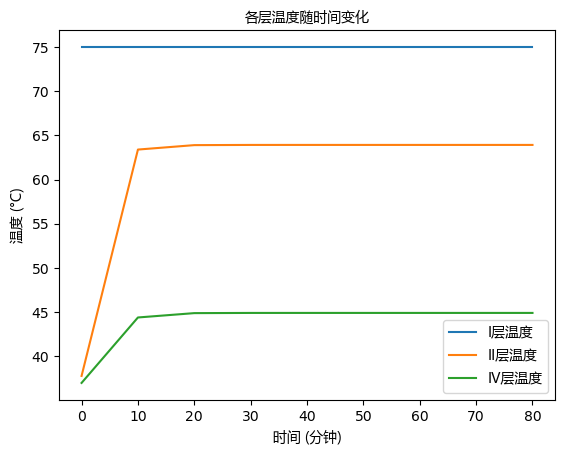

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.font_manager as fm

# 材料参数
k1, k2, k3 = 0.04, 0.02, 0.01  # 热导率 (W/m·K)
rho1, rho2, rho3 = 130, 160, 190  # 密度 (kg/m³)
cp1, cp2, cp3 = 1000, 1000, 1000  # 比热容 (J/kg·K)

# 问题条件
env_temp = 75  # 环境温度 (°C)
init_temp = 37  # 初始假人体温 (°C)
t_total = 90 * 60  # 总时间 (秒)
dx = 0.001  # 空间步长 (米)
dt = 1  # 时间步长 (秒)

# 分层厚度
thickness_I = 0.001  # I层厚度 (米)
thickness_II = 0.006  # II层厚度 (米)
thickness_IV = 0.005  # IV层厚度 (米)
thickness_total = thickness_I + thickness_II + thickness_IV

# 计算节点数
n_nodes = int(thickness_total / dx) + 1

# 初始化温度分布
T = np.ones(n_nodes) * init_temp

# 设置边界条件
T[0] = env_temp  # 环境温度
T[-1] = init_temp  # 假人体温

# 计算热扩散系数
alpha1 = k1 / (rho1 * cp1)
alpha2 = k2 / (rho2 * cp2)
alpha3 = k3 / (rho3 * cp3)

# 显式欧拉法进行迭代计算
temperature_distribution = []
time_points = []
for t in range(int(t_total / dt)):
    T_new = T.copy()
    for i in range(1, n_nodes - 1):
        if i < int(thickness_I / dx):
            alpha = alpha1
        elif i < int((thickness_I + thickness_II) / dx):
            alpha = alpha2
        else:
            alpha = alpha3
        T_new[i] = T[i] + alpha * dt / (dx ** 2) * (T[i + 1] - 2 * T[i] + T[i - 1])
    T = T_new.copy()
    if t % 600 == 0:  # 每10分钟记录一次温度分布
        temperature_distribution.append(T.copy())
        time_points.append(t)

# 转换时间点为分钟
time_points = np.array(time_points) / 60

# 分离每层的温度分布
I_layer_indices = slice(0, int(thickness_I / dx))
II_layer_indices = slice(int(thickness_I / dx), int((thickness_I + thickness_II) / dx))
IV_layer_indices = slice(int((thickness_I + thickness_II) / dx), n_nodes)

temperature_I_layer = np.array([dist[I_layer_indices].mean() for dist in temperature_distribution])
temperature_II_layer = np.array([dist[II_layer_indices].mean() for dist in temperature_distribution])
temperature_IV_layer = np.array([dist[IV_layer_indices].mean() for dist in temperature_distribution])

# 保存温度分布到Excel文件
df = pd.DataFrame({
    "时间 (分钟)": time_points,
    "I层平均温度 (°C)": temperature_I_layer,
    "II层平均温度 (°C)": temperature_II_layer,
    "IV层平均温度 (°C)": temperature_IV_layer
})
df.to_excel("./layered_temperature_distribution.xlsx", index=False)

# 设置中文字体
zh_font = fm.FontProperties(fname='C:/Windows/Fonts/msyh.ttc')

# 可视化每层的温度分布随时间变化的关系
plt.figure()
plt.plot(time_points, temperature_I_layer, label='I层温度')
plt.plot(time_points, temperature_II_layer, label='II层温度')
plt.plot(time_points, temperature_IV_layer, label='IV层温度')
plt.xlabel('时间 (分钟)', fontproperties=zh_font)
plt.ylabel('温度 (°C)', fontproperties=zh_font)
plt.title('各层温度随时间变化', fontproperties=zh_font)
plt.legend(prop=zh_font)
plt.savefig("./layered_temperature_vs_time.png")
plt.show()


各层随时间变化


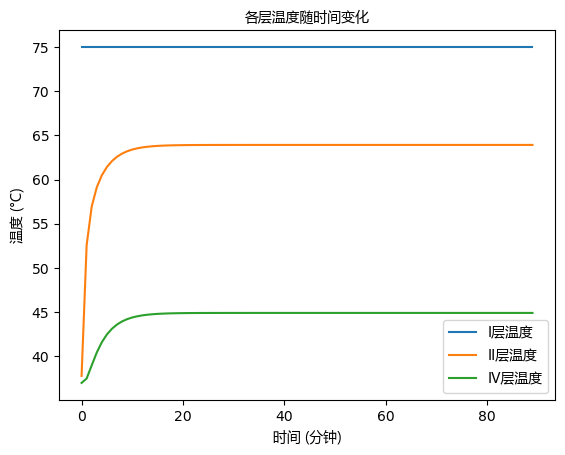

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.font_manager as fm

# 材料参数
k1, k2, k3 = 0.04, 0.02, 0.01  # 热导率 (W/m·K)
rho1, rho2, rho3 = 130, 160, 190  # 密度 (kg/m³)
cp1, cp2, cp3 = 1000, 1000, 1000  # 比热容 (J/kg·K)

# 问题条件
env_temp = 75  # 环境温度 (°C)
init_temp = 37  # 初始假人体温 (°C)
t_total = 90 * 60  # 总时间 (秒)
dx = 0.001  # 空间步长 (米)
dt = 1  # 时间步长 (秒)

# 分层厚度
thickness_I = 0.001  # I层厚度 (米)
thickness_II = 0.006  # II层厚度 (米)
thickness_IV = 0.005  # IV层厚度 (米)
thickness_total = thickness_I + thickness_II + thickness_IV

# 计算节点数
n_nodes = int(thickness_total / dx) + 1

# 初始化温度分布
T = np.ones(n_nodes) * init_temp

# 设置边界条件
T[0] = env_temp  # 环境温度
T[-1] = init_temp  # 假人体温

# 计算热扩散系数
alpha1 = k1 / (rho1 * cp1)
alpha2 = k2 / (rho2 * cp2)
alpha3 = k3 / (rho3 * cp3)

# 显式欧拉法进行迭代计算
temperature_distribution = []
time_points = []
for t in range(int(t_total / dt)):
    T_new = T.copy()
    for i in range(1, n_nodes - 1):
        if i < int(thickness_I / dx):
            alpha = alpha1
        elif i < int((thickness_I + thickness_II) / dx):
            alpha = alpha2
        else:
            alpha = alpha3
        T_new[i] = T[i] + alpha * dt / (dx ** 2) * (T[i + 1] - 2 * T[i] + T[i - 1])
    T = T_new.copy()
    if t % 60 == 0:  # 每分钟记录一次温度分布
        temperature_distribution.append(T.copy())
        time_points.append(t)

# 转换时间点为分钟
time_points = np.array(time_points) / 60

# 分离每层的温度分布
I_layer_indices = slice(0, int(thickness_I / dx))
II_layer_indices = slice(int(thickness_I / dx), int((thickness_I + thickness_II) / dx))
IV_layer_indices = slice(int((thickness_I + thickness_II) / dx), n_nodes)

temperature_I_layer = np.array([dist[I_layer_indices].mean() for dist in temperature_distribution])
temperature_II_layer = np.array([dist[II_layer_indices].mean() for dist in temperature_distribution])
temperature_IV_layer = np.array([dist[IV_layer_indices].mean() for dist in temperature_distribution])

# 保存温度分布到Excel文件
df = pd.DataFrame({
    "时间 (分钟)": time_points,
    "I层平均温度 (°C)": temperature_I_layer,
    "II层平均温度 (°C)": temperature_II_layer,
    "IV层平均温度 (°C)": temperature_IV_layer
})
df.to_excel("./layered_temperature_distribution.xlsx", index=False)

# 设置中文字体
zh_font = fm.FontProperties(fname='C:/Windows/Fonts/msyh.ttc')

# 可视化每层的温度分布随时间变化的关系
plt.figure()
plt.plot(time_points, temperature_I_layer, label='I层温度')
plt.plot(time_points, temperature_II_layer, label='II层温度')
plt.plot(time_points, temperature_IV_layer, label='IV层温度')
plt.xlabel('时间 (分钟)', fontproperties=zh_font)
plt.ylabel('温度 (°C)', fontproperties=zh_font)
plt.title('各层温度随时间变化', fontproperties=zh_font)
plt.legend(prop=zh_font)
plt.savefig("./layered_temperature_vs_time.png")
plt.show()
